In [57]:
import numpy as np
import pandas as pd
import missingno as msno

In [58]:
lf = pd.read_csv('Life_Expectancy_Data.csv')
lf.head().T

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011
Status,Developing,Developing,Developing,Developing,Developing
Life expectancy,65,59.9,59.9,59.5,59.2
Adult Mortality,263,271,268,272,275
infant deaths,62,64,66,69,71
Alcohol,0.01,0.01,0.01,0.01,0.01
percentage expenditure,71.2796,73.5236,73.2192,78.1842,7.09711
Hepatitis B,65,62,64,67,68
Measles,1154,492,430,2787,3013


In [59]:
lf.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [60]:
lf = lf.rename(columns = {'Life expectancy ' : 'Life_expectancy',' BMI ' : 'BMI', ' HIV/AIDS' : 'HIV/AIDS', 'Diphtheria ' : 'Diphtheria', ' thinness  1-19 years' : 'thinness 1-19 years' , ' thinness 5-9 years' : 'thinness 5-9 years' }, inplace = False)

In [61]:
lf.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [62]:
lf.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

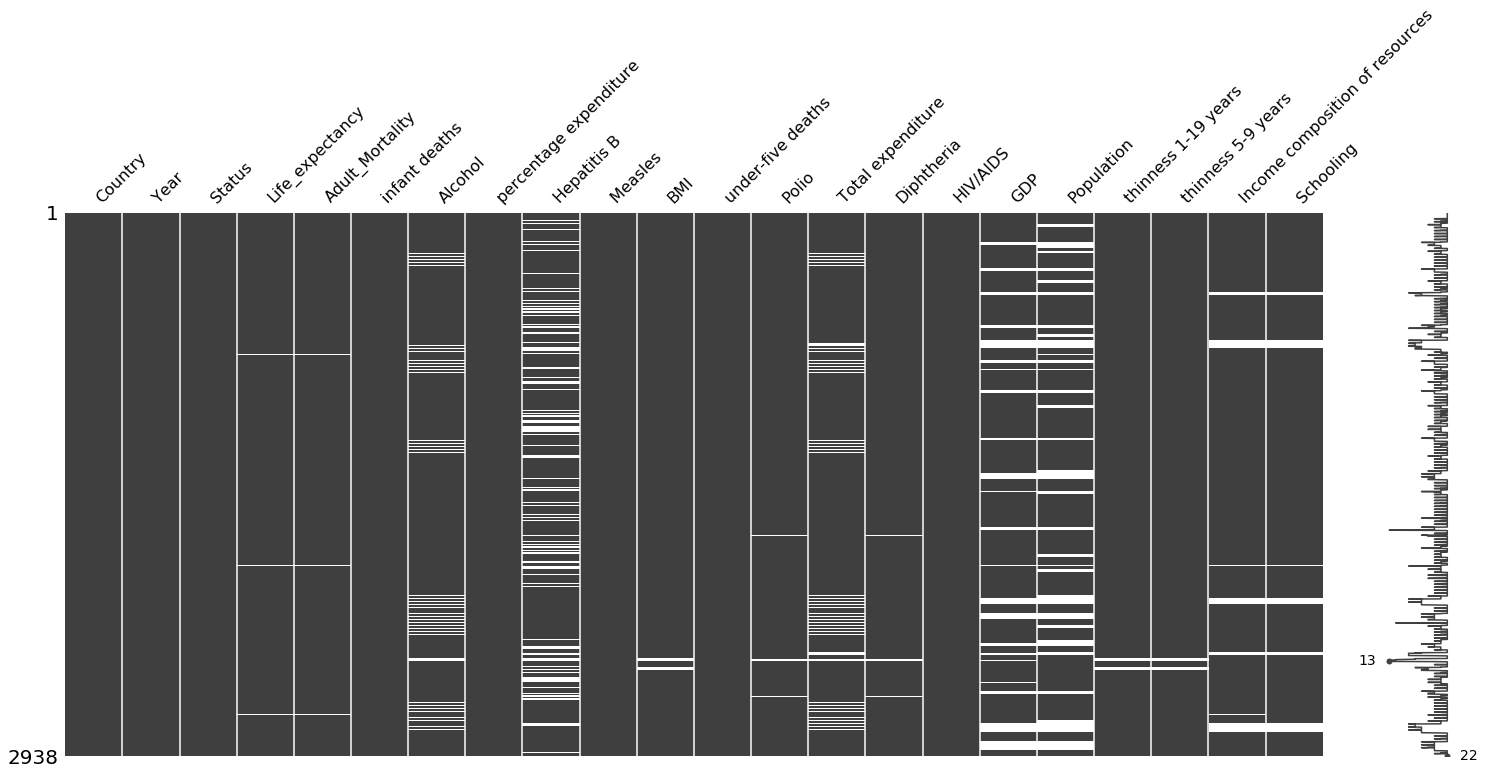

In [45]:
msno.matrix(lf)

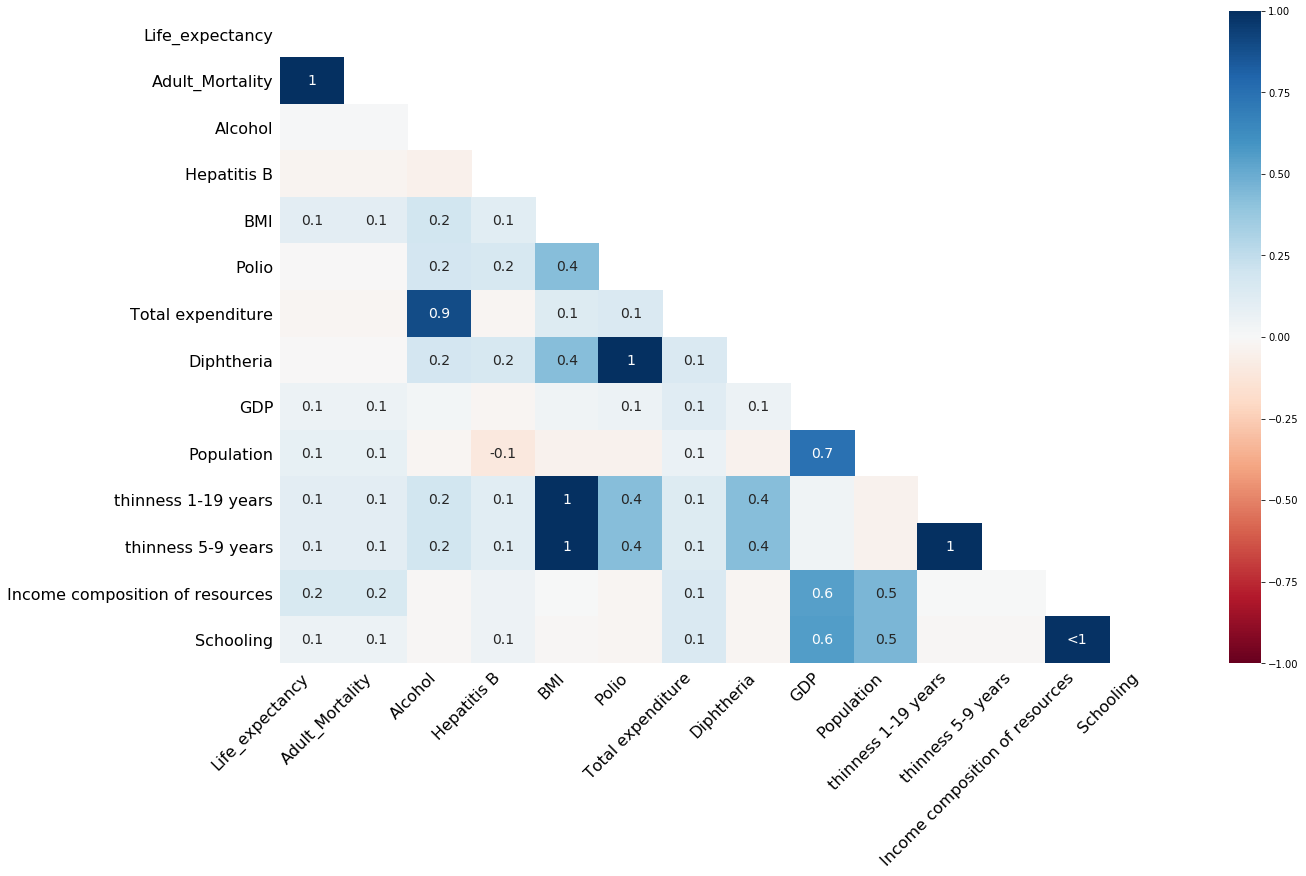

In [46]:
msno.heatmap(lf)

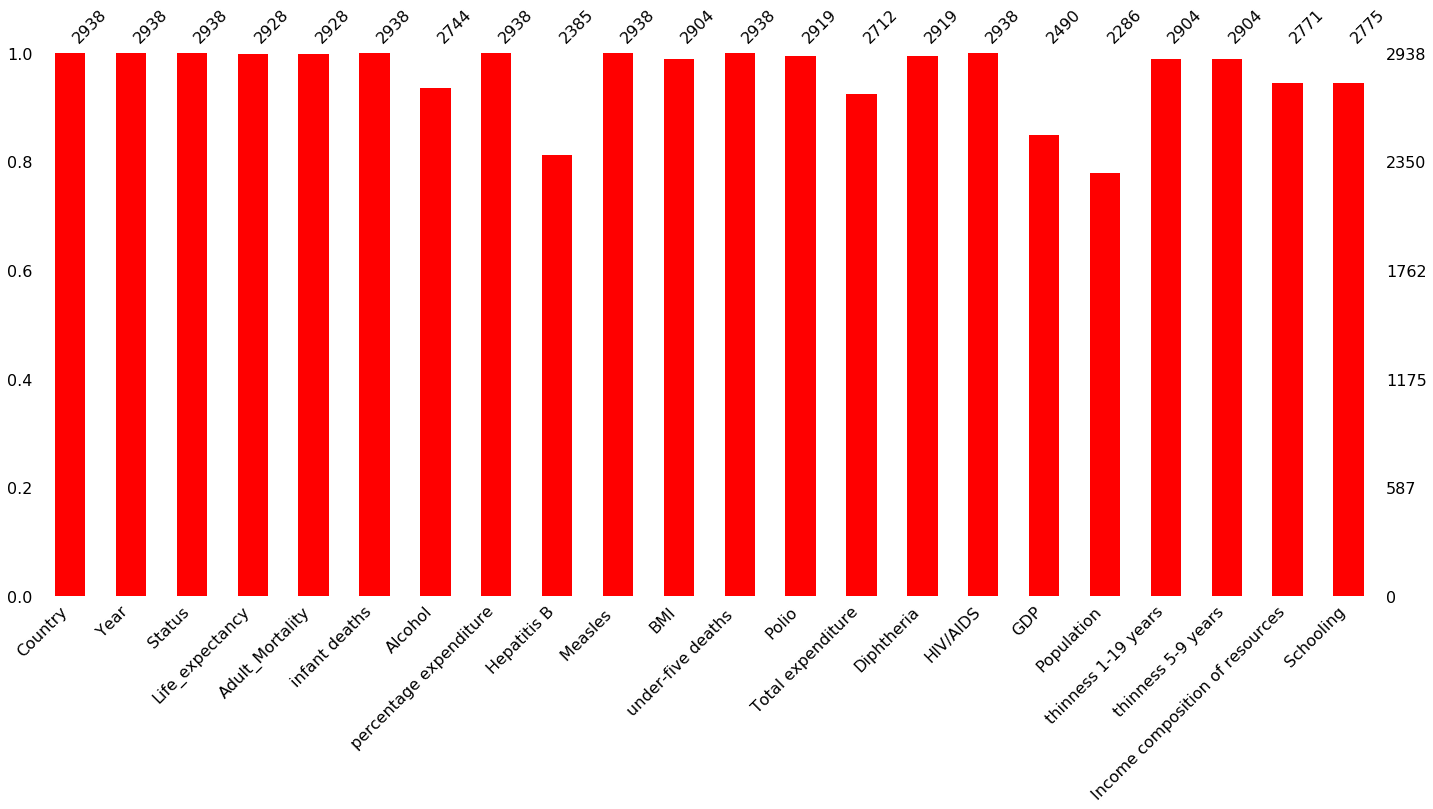

In [47]:
msno.bar(lf, color='red')

In [63]:
missing_life_expectncy = lf[lf['Life_expectancy'].isnull()].index.tolist()
missing_Adult_mortality = lf[lf['Adult Mortality'].isnull()].index.tolist()
if missing_life_expectncy == missing_Adult_mortality:
    print("same")
else:
    print("different")

same


In [64]:
lf.drop(lf.index[missing_life_expectncy], inplace=True)

In [65]:
lf.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness 1-19 years                 32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

In [79]:
missing_thinness19 = lf[lf['thinness 1-19 years'].isnull()].index.tolist()
missing_thinness9 = lf[lf['thinness 5-9 years'].isnull()].index.tolist()
if missing_thinness19 == missing_thinness9:
    print("same")
else:
    print("different")

same


In [86]:
lf.drop(lf.index[missing_thinness9], inplace=True)

In [94]:
lf.isna().sum()

Country                                        0
Year                                           0
Status                                         0
Life_expectancy                                0
Adult Mortality                                0
infant deaths                                  0
Alcohol                                      169
percentage expenditure                         0
Hepatitis B                                  504
Measles                                        0
BMI                                           18
under-five deaths                              0
Polio                                         10
Total expenditure                            180
Diphtheria                                    10
HIV/AIDS                                       0
GDP                                          331
Population                                   539
thinness 1-19 years                           18
thinness 5-9 years                            18
Income composition o

In [91]:
for col in lf.columns:
    missing = lf[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        lf['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in lf.columns if 'ismissing' in col]
lf['num_missing'] = lf[ismissing_cols].sum(axis=1)

ind_missing = lf[lf['num_missing']>9].index
lf_less_missing_rows = lf.drop(ind_missing, axis=0)

created missing indicator for: Alcohol
created missing indicator for: Hepatitis B
created missing indicator for: BMI
created missing indicator for: Polio
created missing indicator for: Total expenditure
created missing indicator for: Diphtheria
created missing indicator for: GDP
created missing indicator for: Population
created missing indicator for: thinness 1-19 years
created missing indicator for: thinness 5-9 years
created missing indicator for: Income composition of resources
created missing indicator for: Schooling


In [92]:
lf_less_missing_rows.isnull().sum()

Country                                        0
Year                                           0
Status                                         0
Life_expectancy                                0
Adult Mortality                                0
infant deaths                                  0
Alcohol                                      169
percentage expenditure                         0
Hepatitis B                                  504
Measles                                        0
BMI                                           18
under-five deaths                              0
Polio                                         10
Total expenditure                            180
Diphtheria                                    10
HIV/AIDS                                       0
GDP                                          331
Population                                   539
thinness 1-19 years                           18
thinness 5-9 years                            18
Income composition o

In [93]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2682 entries, 0 to 2937
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    2682 non-null   object 
 1   Year                                       2682 non-null   int64  
 2   Status                                     2682 non-null   object 
 3   Life_expectancy                            2682 non-null   float64
 4   Adult Mortality                            2682 non-null   float64
 5   infant deaths                              2682 non-null   int64  
 6   Alcohol                                    2513 non-null   float64
 7   percentage expenditure                     2682 non-null   float64
 8   Hepatitis B                                2178 non-null   float64
 9   Measles                                    2682 non-null   int64  
 10  BMI                     

In [95]:
lf_less_missing_rows.head().T

,0,1,2,3,4
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Year,2015,2014,2013,2012,2011
Status,Developing,Developing,Developing,Developing,Developing
Life_expectancy,65,59.9,59.9,59.5,59.2
Adult Mortality,263,271,268,272,275
infant deaths,62,64,66,69,71
Alcohol,0.01,0.01,0.01,0.01,0.01
percentage expenditure,71.2796,73.5236,73.2192,78.1842,7.09711
Hepatitis B,65,62,64,67,68
Measles,1154,492,430,2787,3013
